# **iFood Marketing EDA - Part 1**

# **<u>INTRODUCTION</u>**

## **Task Details**

You're a marketing analyst and you've been told by the Chief Marketing Officer that recent marketing campaigns have not been as effective as they were expected to be. You need to analyze the data set to understand this problem and propose data-driven solutions.

## **Key Objectives**
1. **Data Preparation**
    - Data Overview
    - Data Wrangling/Cleaning
2. **Exploratory Data Analysis (EDA)**
    - Customer Profile Analysis
    - Customer Behavior Analysis (ongoing)
3. **Summary**

# **<u>I. DATA PREPARATION</u>**

First, import the necessary libraries.

In [1]:
# import necessary libraries
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import seaborn as sns

from datetime import datetime

# enable plt graph to display properly in notebook
%matplotlib inline

# setup pandas to display all columns available
pd.set_option('display.max_columns', None)

# set of colors that is used on graph
colors = ['#1f77b4', '#aec7e8', '#6baed6', '#3182bd', '#08519c', '#084594']
colors2 = ['#1f77b4', '#2ca02c', '#d62728', '#8c564b', '#9467bd', '#ff7f0e']

## **1.1 Data Overview**

In [2]:
# load the dataset
ifood_df = pd.read_csv('marketing_data.csv')
ifood_df.head()

,id,YearBirth,Education,MaritalStatus,Income,Kidhome,Teenhome,DtCustomer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/2014,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/2014,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/2014,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/2014,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/2014,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


In [3]:
# preview the information of the data
ifood_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   2240 non-null   int64 
 1   YearBirth            2240 non-null   int64 
 2   Education            2240 non-null   object
 3   MaritalStatus        2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   DtCustomer           2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProducts      2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [4]:
# display basic statistics for each column
ifood_df.describe()

,id,YearBirth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## **1.2 Data Wrangling**

### **1.2.1 Pre-handling data**

#### **(1) Standardizing the column naming**
The column naming itself is consistent already, so <u>renaming is not necessary</u>.

#### **(2) Handling Missing Value**

In [5]:
# look for missing value
ifood_df.isna().sum().loc[lambda x: x > 0]

Income    24
dtype: int64

**Comment:** Here we found 24 missing value in `Income` column, which is not a significant amount of data considering there are 2240 datas in total. So we drop these missing data and continue.

In [6]:
# dropping missing value in Income column
ifood_df = ifood_df.dropna()

#### **(3) Handling Abnormal Value**

In [7]:
# look for abnormal value
obj_col = ['MaritalStatus', 'Education']
for i in range(len(obj_col)):
    print(f"{obj_col[i]} : {ifood_df[obj_col[i]].unique()}")
    print(ifood_df[obj_col[i]].value_counts())

MaritalStatus : ['Divorced' 'Single' 'Married' 'Together' 'Widow' 'YOLO' 'Alone' 'Absurd']
MaritalStatus
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
YOLO          2
Absurd        2
Name: count, dtype: int64
Education : ['Graduation' 'PhD' '2n Cycle' 'Master' 'Basic']
Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64


**Comment:** While `Education` values seems normal, `MaritalStatus` has three abnormal value: `YOLO`, `Alone`, and `Absurd`. These values are only 7 in total, so it is better to drop them instead.

In [8]:
# drop MaritalStatus 'YOLO' and 'Absurd' value
ifood_df = ifood_df[~ifood_df['MaritalStatus'].isin(['Alone', 'YOLO', 'Absurd'])]

### **1.2.2 Additional Handling**

#### **(1) Reformat necessary column**
Let's reformat Income. Then, while we're at it, let's convert it to Float to prepare it for analysis

In [9]:
# reformat Income, and convert it to Float
ifood_df['Income'] = ifood_df['Income'].replace('[\$,]', '', regex=True).astype(float)

#### **(2) Add necessary column**
For later analysis, let's add Age and MntTotal (Total amount of spending) column.

In [10]:
# add Age column
ifood_df['Age'] = 2020 - ifood_df['YearBirth']

# create AgeGroup column as the category for Age
age_labels = ['Millennial', 'Gen X', 'Boomer', 'Above 70']
age_bins = [18, 35, 50, 70, float('inf')]
ifood_df['AgeGroup'] = pd.cut(ifood_df['Age'], bins=age_bins, labels=age_labels)

# add DaysCustomer column
ifood_df['DaysCustomer'] = (pd.to_datetime('2014-12-31') - pd.to_datetime(ifood_df['DtCustomer'])).dt.days

# add TotalMnt column
ifood_df['TotalMnt'] = ifood_df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProducts']].sum(axis=1)

# add TotalPurchases column
ifood_df['TotalPurchases'] = ifood_df['NumWebPurchases'] + ifood_df['NumStorePurchases']

#### **(3) Convert type of necessary column**
Change AgeGroup, Education, and MaritalStatus from Object to Category

In [11]:
# convert AgeGroup to Category
ifood_df['AgeGroup'] = pd.Categorical(ifood_df['AgeGroup'], categories=age_labels, ordered=True)

# convert Education to Category
edu_labels = ['Basic', 'Graduation', '2n Cycle', 'Master', 'PhD']
ifood_df['Education'] = pd.Categorical(ifood_df['Education'], categories=edu_labels, ordered=True)

# convert MaritalStatus to Category
mar_labels = ['Single', 'Together', 'Married', 'Divorced', 'Widow']
ifood_df['MaritalStatus'] = pd.Categorical(ifood_df['MaritalStatus'], categories=mar_labels, ordered=True)

# convert Country to Category
ctry_labels = ifood_df['Country'].value_counts().index.tolist()
ifood_df['Country'] = pd.Categorical(ifood_df['Country'], categories=ctry_labels, ordered=True)

#### **(4) Grouping the columns**
Grouping similar-purpose columns for better references later.

In [12]:
# grouping products, purchases, campaigns
col_demographic = ['Income', 'AgeGroup', 'Education', 'MaritalStatus', 'Kidhome', 'Teenhome', 'DtCustomer', 'Recency']
col_products = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProducts']
col_activity = ['NumWebPurchases', 'NumStorePurchases', 'TotalPurchases', 'NumDealsPurchases', 'NumCatalogPurchases', 'NumWebVisitsMonth']
col_campaigns = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response']

### **1.2.3 Handling Outliers**
We will look for outliers in the data, especially columns that are crucial for our analysis later: `Income`, `Age`, `Products`, `Purchases`

#### **(1) Checking Income Variable**

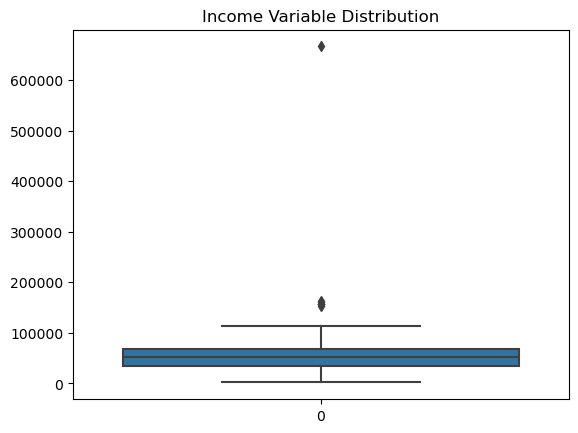

<Figure size 640x480 with 0 Axes>

In [13]:
# create boxplots for income variable
sns.boxplot(ifood_df['Income'])
plt.title('Income Variable Distribution')
plt.show()
plt.clf()

In [14]:
# overview the major outlier
income_Q1 = np.percentile(ifood_df['Income'], 25)
income_Q3 = np.percentile(ifood_df['Income'], 75)
income_IQR = income_Q3 - income_Q1

ifood_df[ifood_df['Income'] > income_Q3 + 1.5 * income_IQR]

,id,YearBirth,Education,MaritalStatus,Income,Kidhome,Teenhome,DtCustomer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,AgeGroup,DaysCustomer,TotalMnt,TotalPurchases
325,4931,1977,Graduation,Together,157146.0,0,0,4/29/2013,13,1,0,1725,2,1,1,0,0,28,0,1,0,0,0,0,0,0,0,SA,43,Gen X,611,1730,0
497,1501,1982,PhD,Married,160803.0,0,0,8/4/2012,21,55,16,1622,17,3,4,15,0,28,1,0,0,0,0,0,0,0,0,US,38,Gen X,879,1717,1
527,9432,1977,Graduation,Together,666666.0,1,0,6/2/2013,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,0,SA,43,Gen X,577,62,6
731,1503,1976,PhD,Together,162397.0,1,1,6/3/2013,31,85,1,16,2,1,2,0,0,0,1,1,0,0,0,0,0,0,0,SP,44,Gen X,576,107,1
853,5336,1971,Master,Together,157733.0,1,0,6/4/2013,37,39,1,9,2,0,8,0,1,0,1,1,0,0,0,0,0,0,0,SP,49,Gen X,575,59,2
1826,5555,1975,Graduation,Divorced,153924.0,0,0,2/7/2014,81,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,SP,45,Gen X,327,6,0
1925,11181,1949,PhD,Married,156924.0,0,0,8/29/2013,85,2,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,CA,71,Above 70,489,8,0
2204,8475,1973,PhD,Married,157243.0,0,1,3/1/2014,98,20,2,1582,1,2,1,15,0,22,0,0,0,0,0,0,0,0,0,IND,47,Gen X,305,1608,0


**Comment:** From the boxplot above, there are several outliers with one extreme amount of $666,666 income. Although it's possible for someone to have higher income than others, but one of them is too big to represent the customers. Additionally, the perfectly-aligned number of `6` indicates that there's a chance it's an error entry. And because it's only 1 data (not significant amount), it's better to drop that major outlier.

In [15]:
# removing any data with abnormal income
ifood_df = ifood_df[ifood_df['Income'] < 600000]

#### **(2) Checking Age Variable**

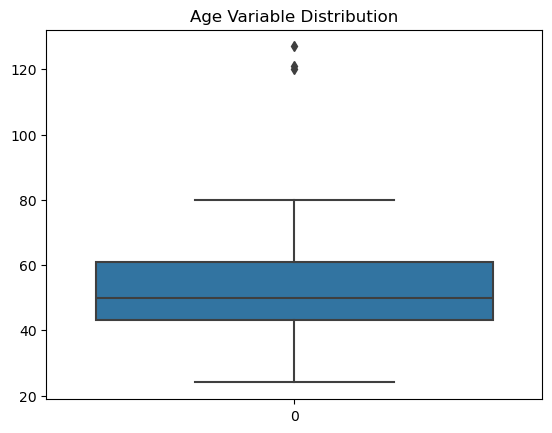

<Figure size 640x480 with 0 Axes>

In [16]:
# create boxplot for age variable
sns.boxplot(ifood_df['Age'])

plt.title('Age Variable Distribution')
plt.show()
plt.clf()

In [17]:
# overview the major outlier
age_Q1 = np.percentile(ifood_df['Age'], 25)
age_Q3 = np.percentile(ifood_df['Age'], 75)
age_IQR = age_Q3 - age_Q1

ifood_df[ifood_df['Age'] > age_Q3 + 1.5 * age_IQR]

,id,YearBirth,Education,MaritalStatus,Income,Kidhome,Teenhome,DtCustomer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,AgeGroup,DaysCustomer,TotalMnt,TotalPurchases
513,11004,1893,2n Cycle,Single,60182.0,0,1,5/17/2014,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,0,SA,127,Above 70,228,22,3
827,1150,1899,PhD,Together,83532.0,0,0,9/26/2013,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,0,SP,121,Above 70,461,1853,8
2233,7829,1900,2n Cycle,Divorced,36640.0,1,0,9/26/2013,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,0,1,IND,120,Above 70,461,65,4


**Comment:** From above, we found that there are three outliers. But customers with age of more than 120 is very unlikely, which indicates a chance of another error entry. There are only 3 datas with abnormal age (again, a non-significant amount), so it's better to drop them and proceed.

In [18]:
# remove any data with abnormal age
ifood_df = ifood_df[ifood_df['Age'] <= age_Q3 + 1.5 * age_IQR]

#### **(3) Checking DaysCustomer Variable**

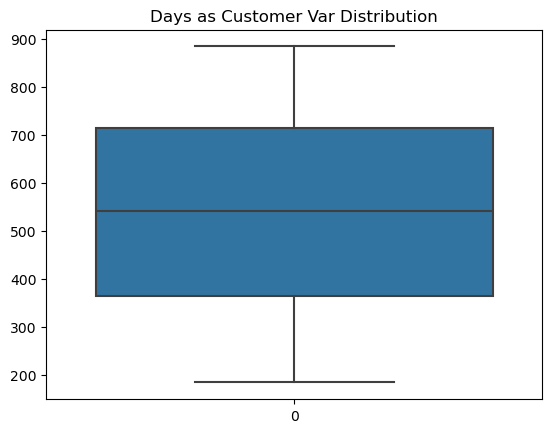

<Figure size 640x480 with 0 Axes>

In [19]:
# create boxplot for DaysCustomer variable
sns.boxplot(ifood_df['DaysCustomer'])

plt.title('Days as Customer Var Distribution')
plt.show()
plt.clf()

**Comment:** There is no outlier in Days as Customer variable, so we can proceed safely.

#### **(4) Checking Recency Variable**

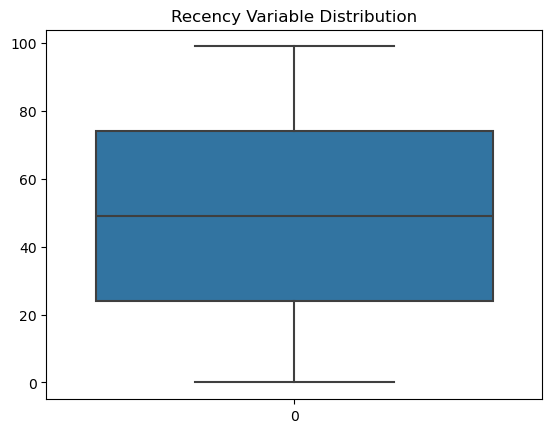

<Figure size 640x480 with 0 Axes>

In [20]:
# create boxplot for Recency variable
sns.boxplot(ifood_df['Recency'])

plt.title('Recency Variable Distribution')
plt.show()
plt.clf()

**Comment:** From the graph, we don't find any outliers from `Recency` variable. So, we can proceed safely without handling anything here.

#### **(5) Checking Products Variables**

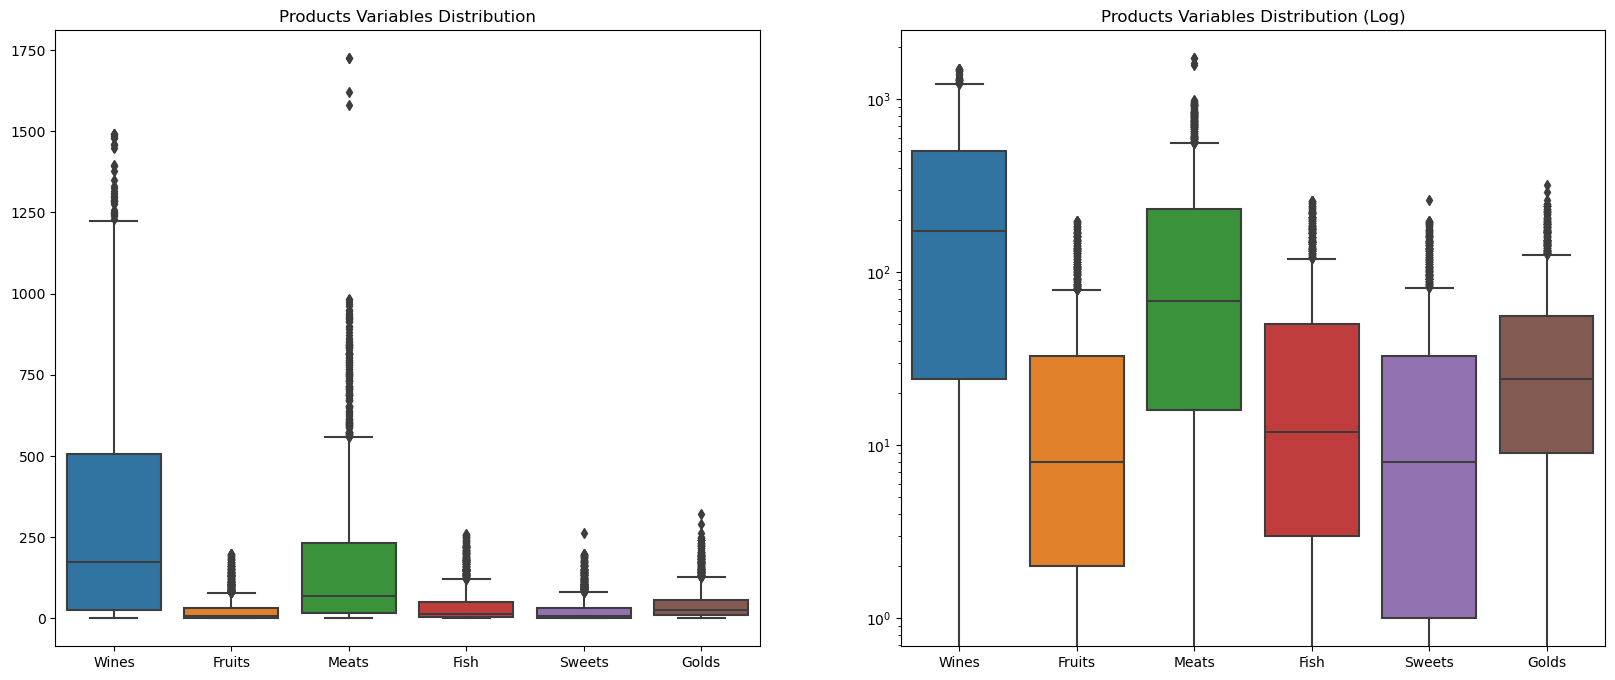

<Figure size 640x480 with 0 Axes>

In [21]:
# create boxplots for each product
fig, ax = plt.subplots(1,2, figsize=(20,8))

# boxplot 1 - normal view
sns.boxplot(ifood_df[col_products], ax=ax[0])
ax[0].set_title('Products Variables Distribution')

# boxplot 2 - log view
sns.boxplot(ifood_df[col_products], ax=ax[1])
ax[1].set_yscale('log')
ax[1].set_title('Products Variables Distribution (Log)')

prd_labels = ['Wines', 'Fruits', 'Meats', 'Fish', 'Sweets', 'Golds']
for a in ax:
    a.set_xticklabels(prd_labels)

plt.show()
plt.clf()

In [22]:
# overview the major outlier
meat_Q1 = np.percentile(ifood_df['MntMeatProducts'], 25)
meat_Q3 = np.percentile(ifood_df['MntMeatProducts'], 75)
meat_IQR = meat_Q3 - meat_Q1

wine_Q1 = np.percentile(ifood_df['MntWines'], 25)
wine_Q3 = np.percentile(ifood_df['MntWines'], 75)
wine_IQR = wine_Q3 - wine_Q1

filtered_df = ifood_df[(ifood_df['MntMeatProducts'] > meat_Q3 + 1.5 * meat_IQR) | (ifood_df['MntWines'] > wine_Q3 + 1.5 * wine_IQR)]
filtered_df.sort_values(by='Income')

,id,YearBirth,Education,MaritalStatus,Income,Kidhome,Teenhome,DtCustomer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,AgeGroup,DaysCustomer,TotalMnt,TotalPurchases
961,5376,1979,Graduation,Married,2447.0,1,0,1/6/2013,42,1,1,1725,1,1,1,15,0,28,0,1,0,0,0,0,0,0,0,US,41,Gen X,724,1730,0
1417,2926,1952,Master,Together,55951.0,0,1,8/23/2012,62,1241,0,80,0,13,40,3,3,6,11,8,0,1,0,0,1,0,0,SA,68,Boomer,860,1374,14
423,6409,1967,Graduation,Divorced,57136.0,0,0,5/18/2013,18,267,140,599,34,12,127,1,7,5,7,6,0,0,0,0,0,1,0,SA,53,Boomer,592,1179,14
1009,6543,1945,Master,Together,62847.0,0,0,1/15/2013,45,521,168,706,80,76,61,1,3,6,4,2,0,0,0,0,0,0,0,CA,75,Above 70,715,1612,7
492,1685,1967,PhD,Together,62981.0,0,0,3/17/2013,21,796,14,590,38,44,0,1,4,5,13,3,0,1,0,0,0,0,0,CA,53,Boomer,654,1482,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,4248,1960,Master,Single,98777.0,0,0,2/17/2014,23,1000,19,711,125,115,38,0,4,6,9,1,0,1,0,0,0,0,0,SP,60,Boomer,317,2008,13
518,7451,1960,Master,Single,98777.0,0,0,2/17/2014,23,1000,19,711,125,115,38,0,4,6,9,1,0,1,0,0,0,0,0,SP,60,Boomer,317,2008,13
325,4931,1977,Graduation,Together,157146.0,0,0,4/29/2013,13,1,0,1725,2,1,1,0,0,28,0,1,0,0,0,0,0,0,0,SA,43,Gen X,611,1730,0
2204,8475,1973,PhD,Married,157243.0,0,1,3/1/2014,98,20,2,1582,1,2,1,15,0,22,0,0,0,0,0,0,0,0,0,IND,47,Gen X,305,1608,0


**Comment:** From the graph, we do know that there are major outliers on `Wine` and `Meat` products. Outliers in the amount of spending on products can be expected due to the customers are likely to be a merchant. These customers are typically have higher incomes. However, there's an anomaly from customer with ID `961`, which has low income of `$2,447` (while others have more than `$50,000`). This contradicts with the `1725` `Meat` products spending that customer had, which might indicate another error. Hence, we have to drop that customer to proceed.

In [23]:
# remove customer data with ID 961
ifood_df = ifood_df[ifood_df['id'] != 961]

#### **(6) Checking Activity Variables**

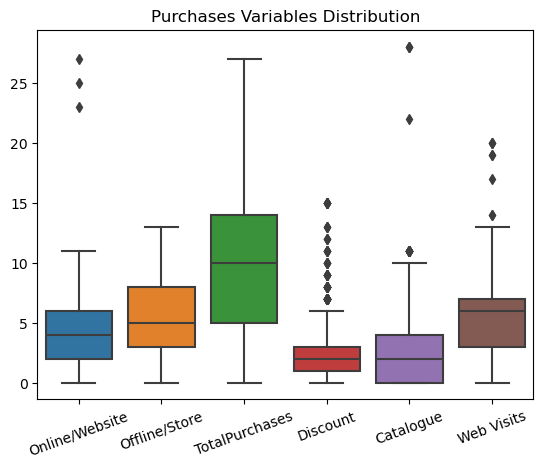

<Figure size 640x480 with 0 Axes>

In [24]:
# create boxplot graph for each purchase funnel
sns.boxplot(ifood_df[col_activity])

act_labels=['Online/Website', 'Offline/Store', 'TotalPurchases', 'Discount', 'Catalogue', 'Web Visits']
plt.xticks(range(6), act_labels, rotation=20)

plt.title('Purchases Variables Distribution')
plt.show()
plt.clf()

**Comment:** The boxplots show that there are some outliers for each `Purchases`variables, except `Store Purchases`. But, considering we're going to learn more about the customer behaviors through these activities, these outliers might be valuable to provide even further insight regarding customers preferences when purchasing things. So, it's better to keep it as it is.

# **<u>II. Exploratory Data Analysis</u>**

## **2.1 Customer Profile Analysis**
This section discuss deeper about customer profile overview. Some columns that involved in this are: `Income`, `AgeGroup`, `Education`, `MaritalStatus`, `Kidhome`, `Teenhome`, and `Country`

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9720\629138469.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ctry_grp = ifood_df.groupby('Country').size()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_9720\629138469.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data = ifood_df.groupby(pie_col[i]).size()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_9720\629138469.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dat

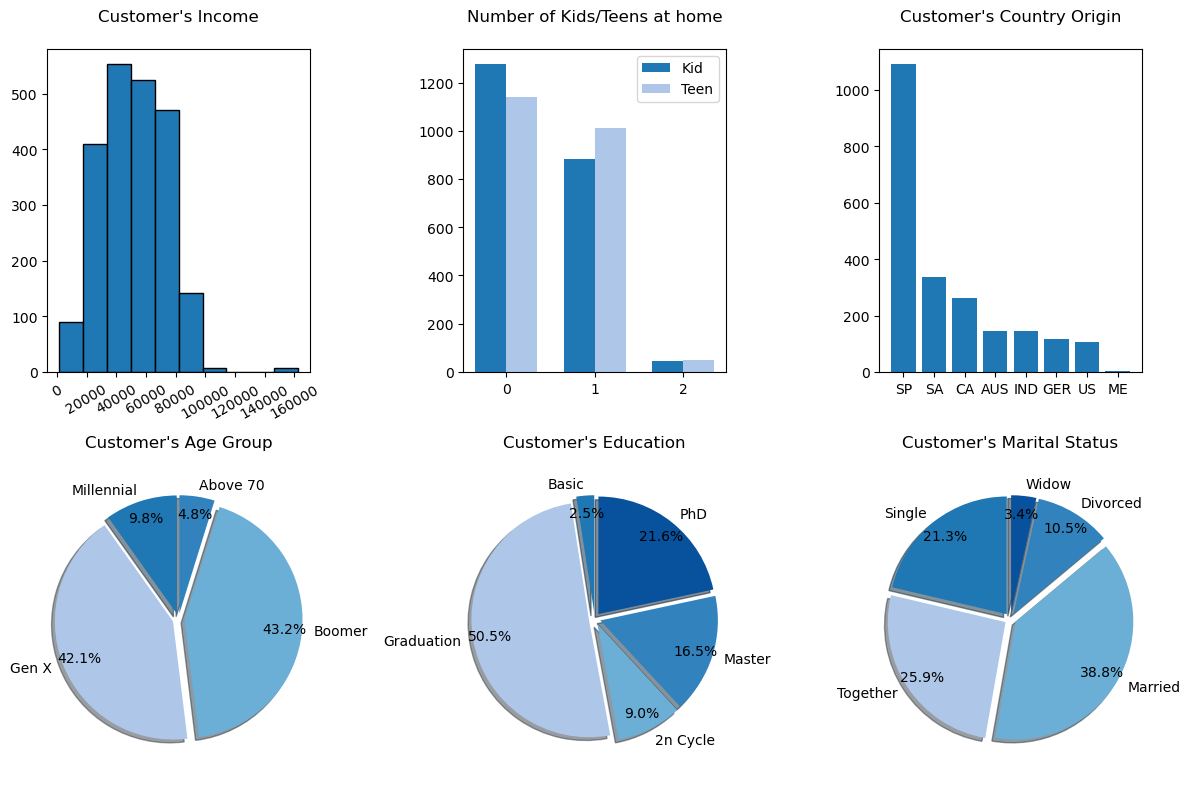

<Figure size 640x480 with 0 Axes>

In [25]:
# prepare the object to analyze
kid_grp = ifood_df['Kidhome'].value_counts()
teen_grp = ifood_df['Teenhome'].value_counts()

ctry_grp = ifood_df.groupby('Country').size()
ctry_grp = ctry_grp[ctry_grp > 0]

# prepare a figure of 2 x 3 layout
fig, ax = plt.subplots(2, 3, figsize=(12,8))

# create histogram for income variable
ax[0,0].hist(ifood_df['Income'], bins=10, edgecolor='black')
ax[0,0].set_title('Customer\'s Income', pad=20)
ax[0,0].xaxis.set_major_locator(ticker.MultipleLocator(20000))
for label in ax[0,0].get_xticklabels():
    label.set_rotation(30)

# create bar chart for number of kids and teens at home variables
x = np.arange(len(kid_grp))
ax[0,1].bar(x - 0.35/2, kid_grp, 0.35, label='Kid', color=colors[0])
ax[0,1].bar(x + 0.35/2, teen_grp, 0.35, label='Teen', color=colors[1])
ax[0,1].set_xticks(x)
ax[0,1].set_xticklabels(kid_grp.index)
ax[0,1].set_title('Number of Kids/Teens at home', pad=20)
ax[0,1].legend()

# create bar chart for country variable
ax[0,2].bar(ctry_grp.index.tolist(), ctry_grp.tolist())
ax[0,2].set_title('Customer\'s Country Origin', pad=20)

# create pie chart for age, education, and marital status variables
pie_col = ['AgeGroup', 'Education', 'MaritalStatus']
pie_name = ['Age Group', 'Education', 'Marital Status']
for i in range(3):
    data = ifood_df.groupby(pie_col[i]).size()
    data = data[data > 0]
    ax[1,i].pie(data, labels=data.index, autopct='%1.1f%%',
       colors=colors[:len(data)], explode=[0.05 for i in range(len(data))],
       startangle=90, pctdistance=0.85, shadow=True)
    ax[1,i].axis('equal')
    ax[1,i].set_title(f"Customer's {pie_name[i]}")

plt.tight_layout()
plt.show()
plt.clf()

<u>**Summary**</u>

From these graphs, we can learn several things about the customers profile:
- `Income` : <u>Most customers have around 20k ~ 80k USD income</u>. As a note, there might be merchants among the customers as some of them have higher income around 150k USD.
- `Age Group` : <u>Most customers are either Boomer (43.2%) or GenX (42.1%)</u>, making up to around 85% of the total. Millennials has smaller portion of 9.8%, and those Above 70 has the smallest segment with 4.8% only.
- `Education` : <u>Most customers are 'Graduation' level (50.5%)</u>, with more than half of the total (50.5%). Then followed by PhD (21.6%), Master (16.5%), 2n Cycle (9.0%), and the least is Basic (2.5%).
- `Marital Status` : <u>Most customers are Married (38.8%)</u>, then followed by Together (25.9%) and Single (21.3%) making up the smaller portion. Divorced (10.5%), and Widow (3.4%) have the least portion.
- `Number of Kids/Teens` : <u>Most customers either have no or one kid/teen</u>, and only a few have 2 at their home.
- `Country Origin` : <u>Most Customers are from SP (Spain)</u>, making up almost half of the total portion. Followed by CA (Canada) and SA (South Africa) with around 300 to 400 people. Then AUS (Australia), IND (India), GER (Germany), and US (United States) with around 100 people. And last, ME (Montenegro) as the smallest portion of customer, with under 100 people.

## **2.2 Customer Behavior**
This section discusses various aspects that might affect a customer's purchasing decision.

### **2.2.1 Overview**
The overview of several variables related to customer behavior. This includes: `Days as Customer`, `Recency`, `Products`, `Online & Offline Purchases`, `Discounts`, and `Catalog`

#### **(1) Customer Engagement**
Bar Chart is used to see the distribution of Old vs New customers, and Low vs High Recency as well.

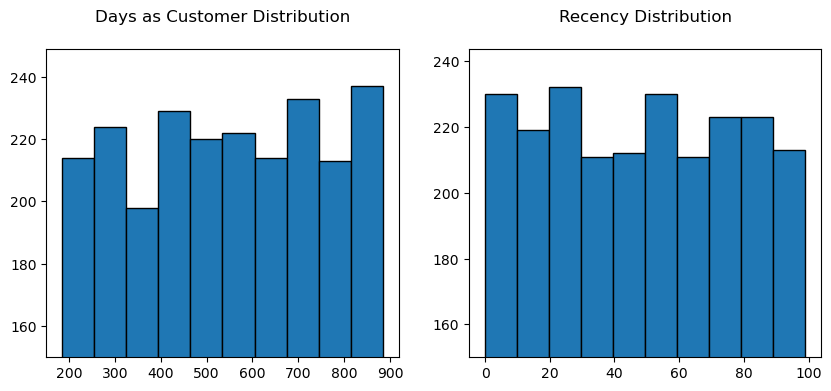

In [26]:
# prepare the column to analyze
obj_col = ['DaysCustomer', 'Recency']
obj_name = ['Days as Customer', 'Recency']

# prepare a figure of 1 x 2 layout
fig, ax = plt.subplots(1, 2, figsize=(10,4))

# create histogram for Days as Customer and Recency variables
for i in range(2):
    ax[i].hist(ifood_df[obj_col[i]], bins=10, edgecolor='black')
    ax[i].set_title(f'{obj_name[i]} Distribution', pad=20)
    ax[i].set_ylim(150, None)

In [27]:
# extra info for Days as Customer and Recency variables
obj_col = ['DaysCustomer', 'Recency']
for i in range(len(obj_col)):
    min = ifood_df[obj_col[i]].min()
    max = ifood_df[obj_col[i]].max()
    print(f'Range of {obj_col[i]} is {min} to {max}')

Range of DaysCustomer is 185 to 884
Range of Recency is 0 to 99


**Comment:** From these graphs, we can learn:
- `Days as Customer` : The data ranges from 185 days (about 3 months ago) to 884 (about 2 years ago) only, and it's an uptrend towards the older customers. This means that the new customers engagement is indeed suffered from a small decrease. If this continues, it could be a big problem.
- `Recency` : There is no significant pattern, but there is a small downtrend to older recency. This means there are tend to be more active customers than inactive ones, spreading from 0 day to 99 days.

#### **(2) Product Sold Analysis**
Boxplot is used to see the distribution of each product types sold to customers. Then, Pie Chart is used to see the portions made by each product type to the total sales made.

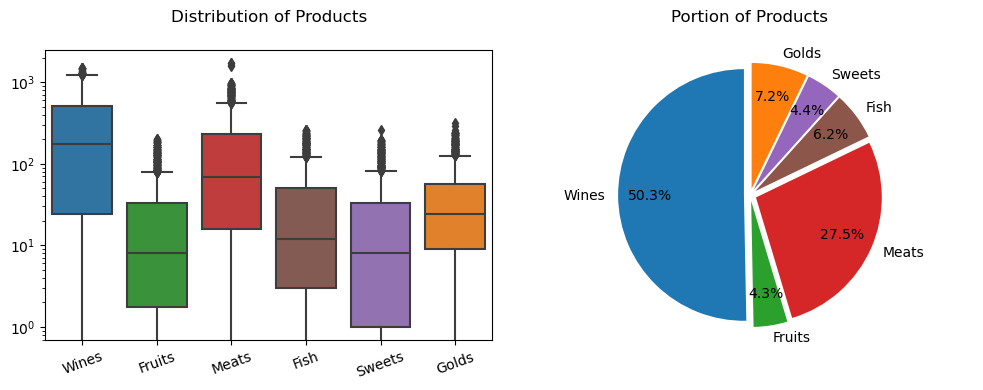

<Figure size 640x480 with 0 Axes>

In [28]:
# prepare a figure of 1 x 2 layout
fig, ax = plt.subplots(1, 2, figsize=(10,4))

# create boxplot for each Product
boxplot = sns.boxplot(ifood_df[col_products], ax=ax[0], palette=colors2)
ax[0].set_title(f'Distribution of Products', pad=20)
ax[0].set_xticklabels(prd_labels)
for label in ax[0].get_xticklabels():
    label.set_rotation(20)
ax[0].set_yscale('log')

# create pie chart for each Product
data = ifood_df[col_products].sum()
ax[1].pie(data, labels=prd_labels, autopct='%1.1f%%',
    colors=colors2, explode=[0.05 for i in range(len(data))],
    startangle=90, pctdistance=0.75)
ax[1].axis('equal')
ax[1].set_title(f'Portion of Products', pad=20)

plt.tight_layout()
plt.show()
plt.clf()

**Comment:** Most bought product is Wine Products, making up a little more than half of the total sales made. Followed by Meats (27.5%), Golds (7.2%), Fish (6.2%), Sweets (4.4%), and Fruits (4.3%). The enormous amount in Wine and Meat products might be due to it as a category bought by merchant-customers, who tends to buy in large amount.

#### **(3) Online vs Offline Activity**
Pie Chart is used to see the portions of Online vs Offline Purchases, and percentage of customers who ever vs never visited the website in the month. Then, Boxplot is used to see the distribution of Web Visits.

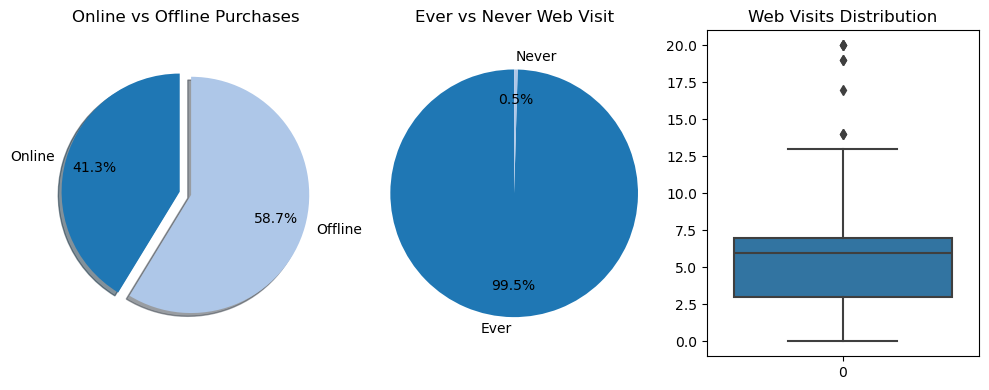

<Figure size 640x480 with 0 Axes>

In [29]:
# prepare the object for analysis
offline = ifood_df['NumStorePurchases'].sum()
online = ifood_df['NumWebPurchases'].sum()

ever_visit = (ifood_df['NumWebVisitsMonth'] > 0).sum()
never_visit = (ifood_df['NumWebVisitsMonth'] == 0).sum()

# prepare a figure of 1 x 3 layout
fig, ax = plt.subplots(1, 3, figsize=(10,4))

# create pie chart for online vs offline
data = [online, offline]
ax[0].pie(data, labels=['Online', 'Offline'], autopct='%1.1f%%',
    colors=colors, explode=[0.05 for i in range(len(data))],
    startangle=90, pctdistance=0.75, shadow=True)
ax[0].axis('equal')
ax[0].set_title('Online vs Offline Purchases')

# create pie chart for customers who ever visited the website
data = [ever_visit, never_visit]
ax[1].pie(data, labels=['Ever', 'Never'], autopct='%1.1f%%',
    colors=colors, startangle=90, pctdistance=0.75)
ax[1].axis('equal')
ax[1].set_title('Ever vs Never Web Visit')

# create boxplot for web visits
sns.boxplot(ifood_df['NumWebVisitsMonth'], ax=ax[2])
ax[2].set_title('Web Visits Distribution')

plt.tight_layout()
plt.show()
plt.clf()

**Comment:** From this, we can learn:
- `Online vs Offline` : **Purchases are made via Offline or Store, more than Online/Website**, covering 58.7% of total Purchases
- `Web Visits` : **Almost all of the customers have visited the website**, and it's pretty often (around 3 to 7 times per person).

It's found that customers do visited the website, but they didn't make the purchase. Instead most of them prefer offline or store, and make their purchase there instead. This shows that the customers are not fond of the website's purchasing method. Most of them might be having trouble using it.

#### **(4) Discount and Catalogue**
Pie Chart is used to see percentage of purchases made from Discount/Deals and Catalogue, versus normal purchases.

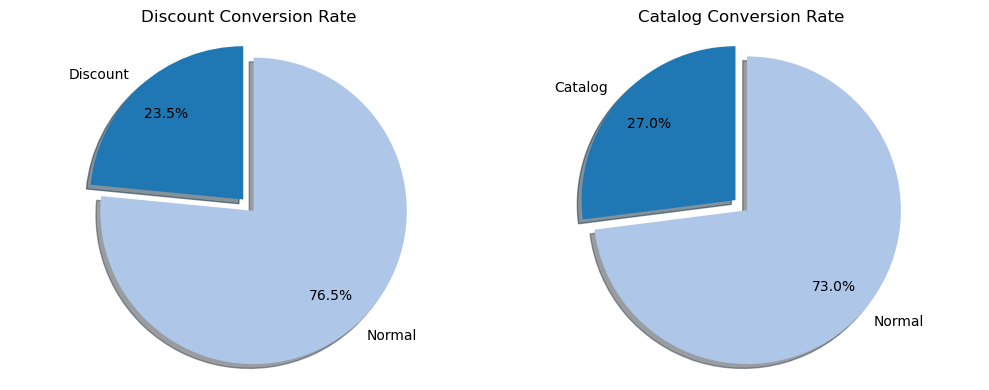

<Figure size 640x480 with 0 Axes>

In [30]:
# prepare the object for analysis
total_purchases = (ifood_df['NumWebPurchases'] + ifood_df['NumStorePurchases']).sum()
total_disc = ifood_df['NumDealsPurchases'].sum()
total_catalog = ifood_df['NumCatalogPurchases'].sum()

# prepare a figure of 1 x 2 layout
fig, ax = plt.subplots(1, 2, figsize=(10,4))

# create pie chart for Discounted and Catalog Purchases
obj = [total_disc, total_catalog]
obj_name = ['Discount', 'Catalog']
for i in range(len(obj)):
    ax[i].pie([obj[i], total_purchases-obj[i]], labels=[obj_name[i], 'Normal'], autopct='%1.1f%%',
        colors=colors, explode=[0.05,  0.05],
        startangle=90, pctdistance=0.75, shadow=True)
    ax[i].axis('equal')
    ax[i].set_title(f'{obj_name[i]} Conversion Rate')

plt.tight_layout()
plt.show()
plt.clf()

**Comment:** From these graphs, we found that previous Sales Promotion via Discount and Catalog are pretty effective already. Both of them are more than 20% of the total purchases.

### **2.2.2 Correlation Analysis**
Heat Matrix is used to see the correlation strength of each variable, to see which one that affect customer's behavior the most.

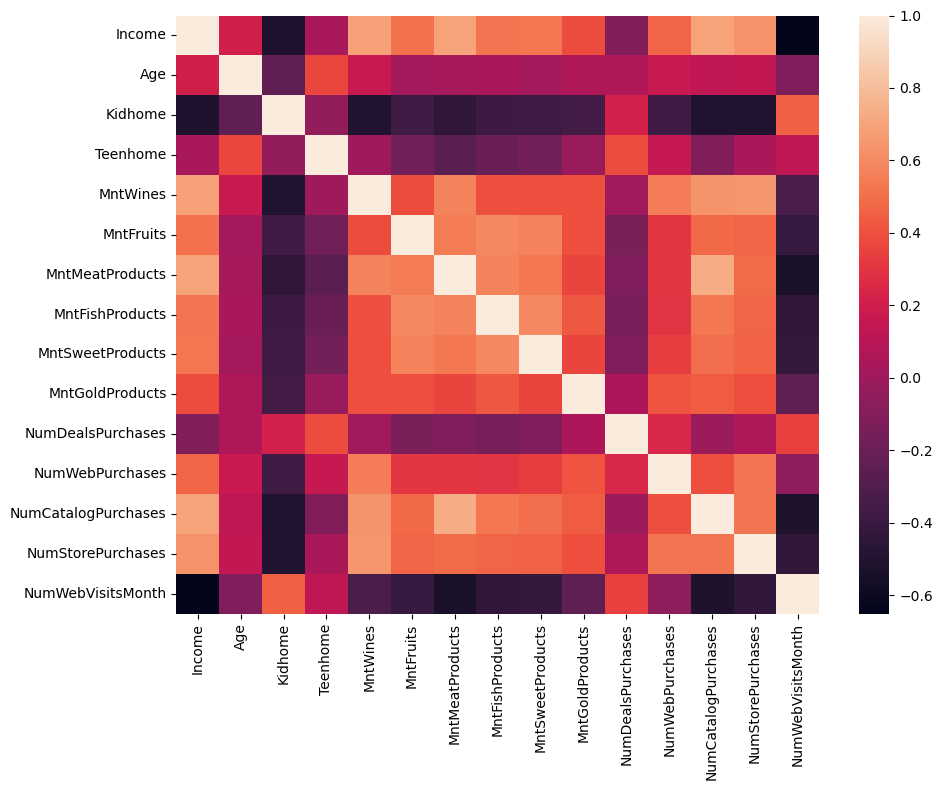

<Figure size 640x480 with 0 Axes>

In [31]:
# prepare the object for analysis
obj_corr = ifood_df[['Income', 'Age', 'Kidhome', 'Teenhome', 
                     'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProducts',
                     'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',]]

# create heat matrix to show correlation of all numerical variables
plt.figure(figsize=(10,8))
sns.heatmap(data=obj_corr.corr(),annot=False)
plt.tight_layout()
plt.show()
plt.clf()

**Comment:** The heat matrix shows that `Income` has the best correlation to overall `Products` and `Behavioral` variables, by being the one with the brighter color (stronger correlation) among other numerical demographic variables. After `Income`, there's also `Age` variable that has the second-best influence to overall `Products` and `Activity` variables.

#### **(1) Customer Behavior by Income**

##### <u>(1a) Income vs Products
Scatterplot is used on `Income` vs `Products` to see the relation between income to each product types

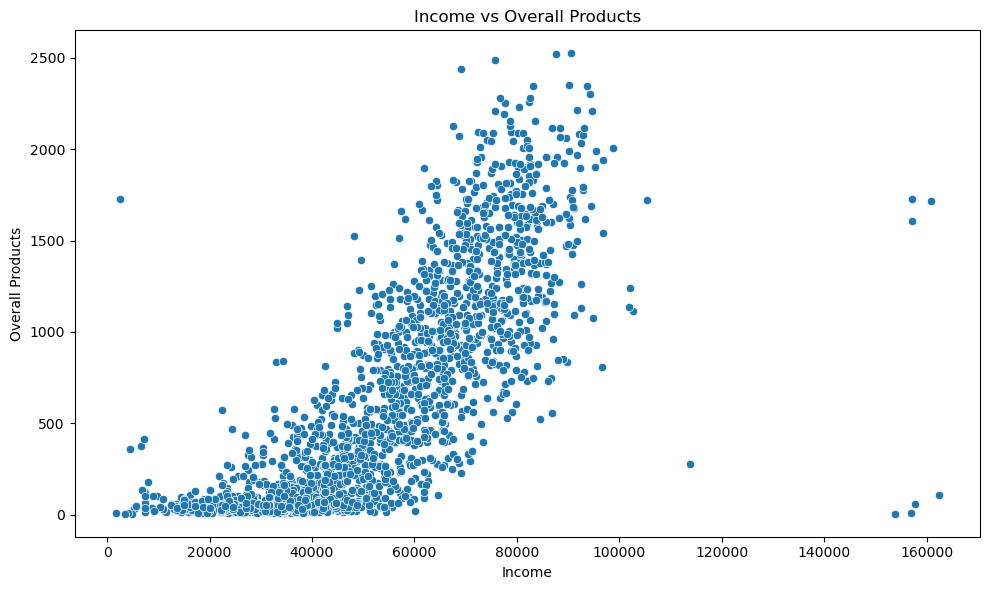

<Figure size 640x480 with 0 Axes>

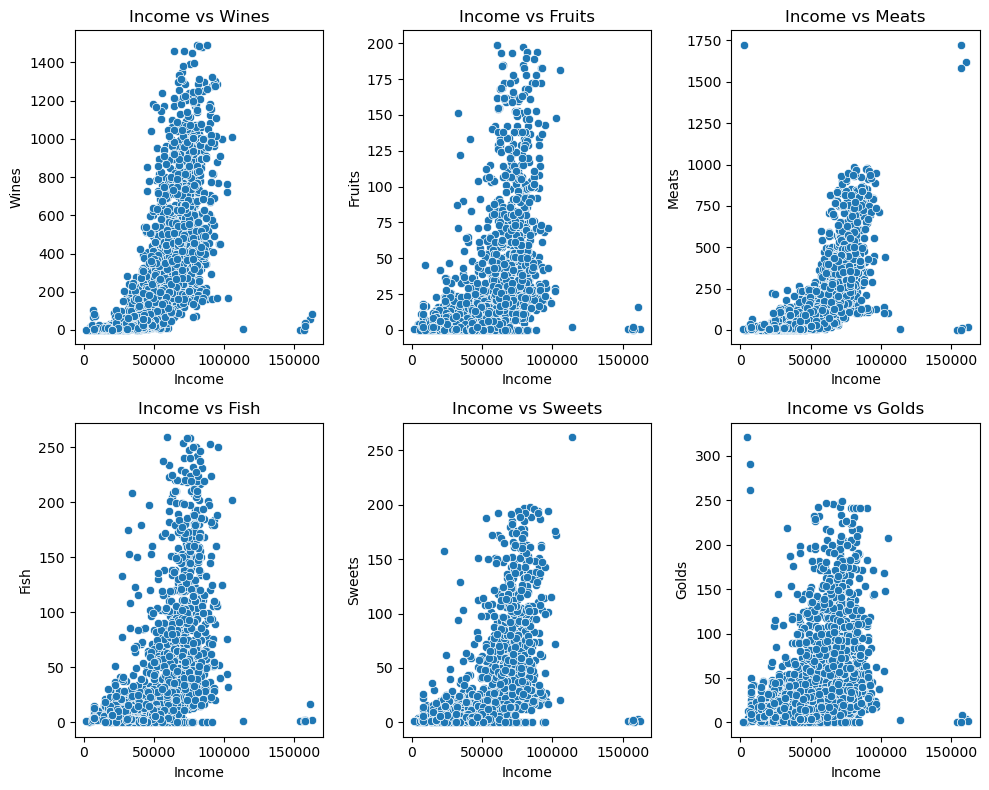

<Figure size 640x480 with 0 Axes>

In [32]:
# create scatterplot for income to overall product purchased
plt.subplots(figsize=(10,6))

sns.scatterplot(x=ifood_df['Income'], y=ifood_df['TotalMnt'])
plt.title('Income vs Overall Products')
plt.ylabel('Overall Products')

plt.tight_layout()
plt.show()
plt.clf()

# prepare a figure of 2 x 3 layout
fig, ax = plt.subplots(2, 3, figsize=(10,8))
axs = ax.flatten()

# create scatterplot for income to each types of products
for i in range(len(col_products)):
    sns.scatterplot(x=ifood_df['Income'], y=ifood_df[col_products[i]], ax=axs[i])
    axs[i].set_title(f'Income vs {prd_labels[i]}')
    axs[i].set_ylabel(f'{prd_labels[i]}')

plt.tight_layout()
plt.show()
plt.clf()

**Comment:** All of the graphs show similar pattern, that there is positive relationship between `Income` and `Mnt{type}Products`. This means an increase in `Income` will also increase the amount customer spent on all products. However, there's a bit deviation at some really-high income where spending is strangely low. This could be due to different spending habits or priorities on some high-income individuals.

##### <u>(1b) Income vs Activity
Scatterplot is used to see the relation between `Income` on `Activity` variables. For better view, `.regplot()` is used to provide additional line on the graph.

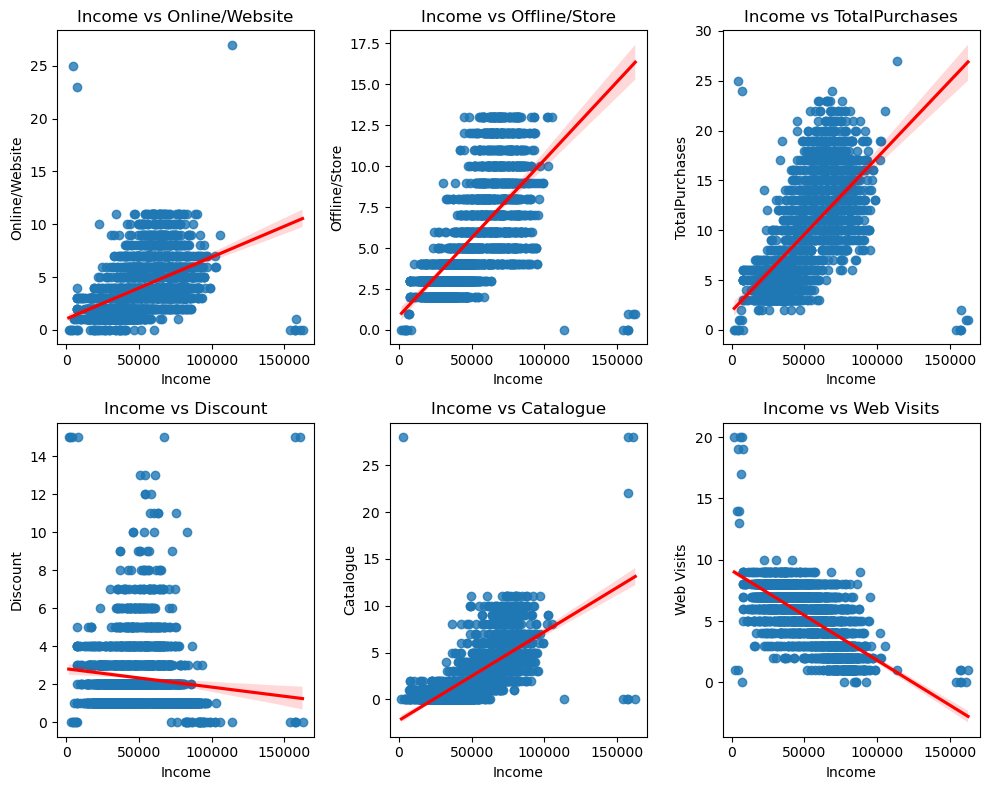

<Figure size 640x480 with 0 Axes>

In [33]:
# prepare a figure of 2 x 3 layout
fig, ax = plt.subplots(2, 3, figsize=(10,8))
axs = ax.flatten()

# create scatterplot for income to each types of products
for i in range(len(col_activity)):
    sns.regplot(x=ifood_df['Income'], y=ifood_df[col_activity[i]], ax=axs[i],
               line_kws={"color": "red"})
    axs[i].set_title(f'Income vs {act_labels[i]}')
    axs[i].set_ylabel(f'{act_labels[i]}')

plt.tight_layout()
plt.show()
plt.clf()

**Comment:** From the graphs above, we found several things:
- `Offline vs Online` : The graph shows a strong positive correlation between `Income` and both `Offline/Store` and `TotalPurchases`. However, the positive correlation between `Income` and `Online/Website` decreases, indicating that higher-income customers prefer shopping offline than online.
- `Discount & Catalogue` : There is a slight negative correlation between `Income` and `Discount`, but a mediocre positive correlation when paired with `Catalogue`. This indicates that discounts are more popular among lower-income customers, while catalogues are preferred by higher-income customers.
- `Web Visits` : There's mediocre negative correlation between `Income` and `Web Visits`. This shows that higher-income customers didn't visit the website as often as lower-income customers.

#### **(2) Customer Behavior by Age**

##### <u>(2a) Age vs Products
Bar Chart is used to see how customers from each `Age Group` make their buying decision on overall and each `Products`.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9720\3598373498.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obj_total = ifood_df.groupby('AgeGroup')[col_products+['TotalMnt']].sum().reset_index()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_9720\3598373498.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obj_median = ifood_df.groupby('AgeGroup')[col_products+['TotalMnt']].median().reset_index()


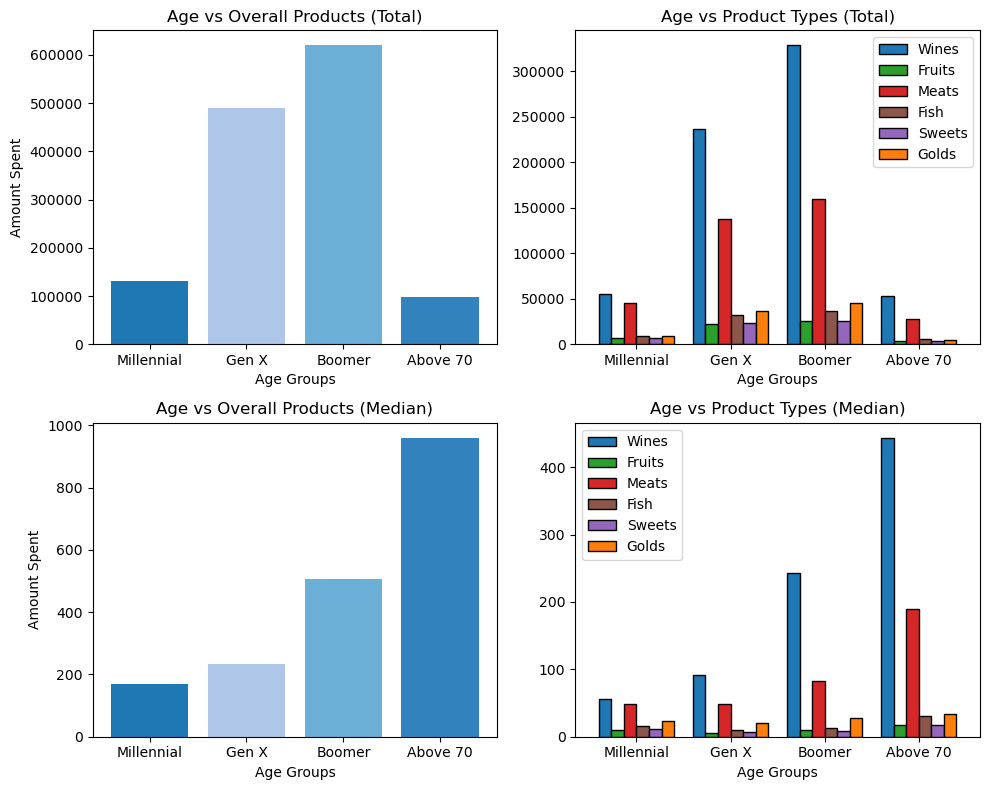

<Figure size 640x480 with 0 Axes>

In [34]:
# prepare the objects for analysis
obj_total = ifood_df.groupby('AgeGroup')[col_products+['TotalMnt']].sum().reset_index()
obj_total = obj_total[obj_total['TotalMnt'] > 0]

obj_median = ifood_df.groupby('AgeGroup')[col_products+['TotalMnt']].median().reset_index()
obj_median = obj_median[obj_median['TotalMnt'] > 0]

# prepare figure of 3 x 2 layout
fig, ax = plt.subplots(2, 2, figsize=(10,8))

# create bar chart for each objects in total, mean, median
obj = [obj_total, obj_median]
obj_name = ['Total', 'Median']

for i in range(len(obj)):
    # create bar chart for age group vs overall products bought    
    ax[i,0].bar(obj[i]['AgeGroup'], obj[i]['TotalMnt'], color=colors)
    ax[i,0].set_xlabel('Age Groups')
    ax[i,0].set_ylabel('Amount Spent')
    ax[i,0].set_title(f'Age vs Overall Products ({obj_name[i]})')

    # create bar chart for age group vs each type of products bought
    obj[i].plot(x='AgeGroup', y=col_products, kind='bar', ax=ax[i,1],  label=prd_labels, width=0.8, edgecolor='black', color=colors2)
    ax[i,1].set_title(f'Age vs Product Types ({obj_name[i]})')
    for label in ax[i,1].get_xticklabels():
        label.set_rotation(0)
    ax[i,1].set_xlabel('Age Groups')
    ax[i,1].legend()

plt.tight_layout()
plt.show()
plt.clf()

**Comment:** No special pattern was found in the amount spent on different types of products among the `Age Groups`, indicating no significant relationship between `Age Groups` and product types. However, most total sales are made by `Gen X` and `Boomers`, which is consistent with earlier analysis showing these groups as the majority of the customers. Interestingly, when visualized using `median`, the average spending per purchase tends to increase with customer age.

There is inconsistency between `Gen X` and `Boomers` being the highest in terms of total amount spent, and `Above 70` group being the one with highest average spending in single purchases. This is because the customers are dominated with `Gen X` and `Boomers`, while `Above 70` is only a few people. Hence, they make the most total amount of spendings naturally.

##### <u>(2b) Age vs Activity
Bar Chart is used to see the relationship between `Age Group` on each `Activity` variables.

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gr

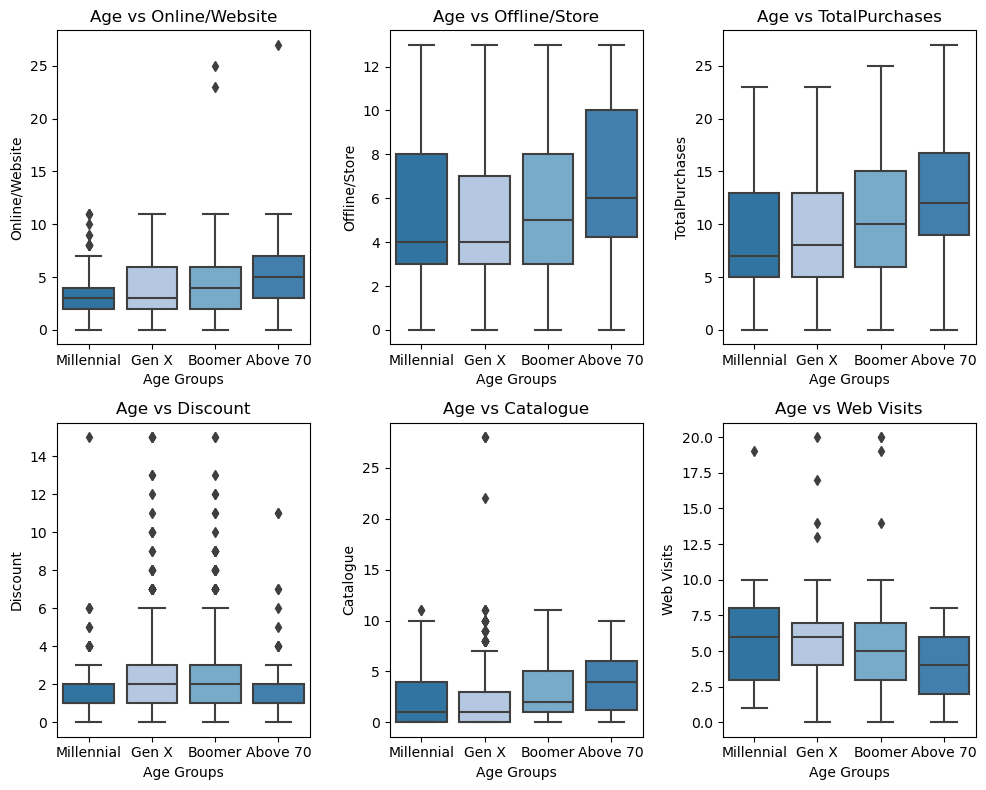

<Figure size 640x480 with 0 Axes>

In [38]:
# create Boxplots to see the distribution of AgeGroup on each Activity variables
fig, axs = plt.subplots(2, 3, figsize=(10,8))
ax = axs.flatten()

for i in range(len(col_activity)):
    sns.boxplot(x='AgeGroup', y=col_activity[i], data=ifood_df, ax=ax[i], palette=colors)
    ax[i].set_title(f'Age vs {act_labels[i]}')
    ax[i].set_ylabel(act_labels[i])
    ax[i].set_xlabel('Age Groups')

plt.tight_layout()
plt.show()
plt.clf()

**Comment:** From these graphs, we can conclude that:
- `Online vs Offline` : Customers aged `Above 70` make the most purchases across all channels. Followed by `Gen X` and `Boomers`. then `Millennial` make the fewest purchases overall.
- `Discount` : `Millennial` and `Above 70` customers shows the least interest in making discounted purchases.
- `Catalogue` : `Above 70` customers prefer catalogs the most, and `Gen X` showing the least interest.
- `Web Visits` : `Millennial` visit the website most frequently, while Above 70 customers visit the site the least.

# <u>**III. CONCLUSION**</u>

## **3.1 Analysis Summary**

**Customer Profile**, most of the customers are: 
- 20k ~ 80k USD of income
- Gen X or Boomer (35 to 70 y/o)
- Graduation education-level
- Married
- Have either none or one kid/teen at their home
- From Spain.

**Customer Behavior Overview**
1) <u>Old vs New, and Recency</u>
    - A slight decrease on new customers compared to older customers, showing a bad new customer engagement.
    - A slight increase on customers' recency, showing a good existing customer engagement.
2) <u>Products Sold</u> : Most product sold is Wine products (50.5%), followed by Meats (27.5%), Golds (7.2%), Fish (6.2%), Sweets (4.4%), and Fruits (4.3%).
3) <u>Online vs Offline</u> : Online/Website purchases are more popular than Offline/Store purchases
4) <u>Web Visits</u> : Almost all customers have visited the website before (99.5%), with around 3 to 7 visits each person.
5) <u>Discount & Catalogue</u>
    - Discount managed to reach 23.5% conversion rate
    - Catalog managed to reach 27.0% conversion rate

**Correlation Analysis**

Analysis shows that `Income` had the strongest correlation to both `Products` and `Customer Activity` variables. Additionally, analysis on `Age` variable, as the variable with second strongest correlation, has been conducted as well.

By `Income`, we found that:
- Higher income customers tends to buy more products and make more purchases.
- Higher income customers prefers offline/store, slightly more than online/website.
- Discounts is a bit more popular on lower income customers, while Catalogues are preferred by higher income customers.
- Higher income customers visits the website more frequently.

By `Age`, we found that:
- No significant relation between Age and Product Type preferences
- Gen X and Boomers made the most overall sales, while older customers buy more in a single purchase..
- Customers above 70 years old made purchases more frequently.
- Gen X and Boomers have more interest in discounts, while catalogues is more popular to customers above 70 years old.
- Millennials visits the website more frequently.

## **3.2 Suggestion**

We should focus catalogues for targeting higher-income customers, especially in website. While discounts should be mainly used to target lower-income customers. It's also a good idea to target Gen X and Boomers customers, which are the dominant group of the customers and contribution of total sales. Keep in mind that discounts are popular to these groups as well.

Another thing is that more than half of customers are graduate education-level and from Spain. Next marketing campaign might want to consider these attributes as well.

## **3.3 Further Analysis**

This dataset has some more information, and more correlations can be explored between available variables. Some of them are:
- Previous marketing campaigns performance
- Customer feedback (complaints)
- Correlation between `Education Level` or `Marital Status` to `Products` and `Activity`